In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In /Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Tanner/opt/anaconda3/lib/pytho

In [2]:
df = pd.read_csv('./data/df.csv', index_col=None, header=0)
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star
0,AJ Hammons_2017,DAL,24.0,22.0,4.0,18.0,163.0,48.0,17.0,42.0,...,4.0,10.0,1.0,13.0,21.0,129.2,0.0,0.0,-5.0,0.0
1,Aaron Brooks_2017,IND,32.0,65.0,36.0,29.0,894.0,322.0,121.0,300.0,...,125.0,66.0,25.0,9.0,93.0,628.3,0.0,0.0,-32.0,0.0
2,Aaron Gordon_2017,ORL,21.0,80.0,29.0,51.0,2298.0,1019.0,393.0,865.0,...,150.0,89.0,65.0,40.0,172.0,1956.0,7.0,0.0,-163.0,0.0
3,Aaron Harrison_2017,CHA,22.0,5.0,2.0,3.0,17.0,1.0,0.0,4.0,...,3.0,0.0,0.0,0.0,2.0,9.1,0.0,0.0,-5.0,0.0
4,Adreian Payne_2017,MIN,26.0,18.0,5.0,13.0,135.0,63.0,23.0,54.0,...,7.0,8.0,8.0,7.0,32.0,150.1,0.0,0.0,8.0,0.0


In [3]:
df = df.dropna()

In [4]:
df.shape

(8944, 30)

$$Data Dictionary$$

| Abbreviation | Definition |
|---|---|
|GP |Games Played 
|W |Wins 
|L |Losses 
|MIN |Minutes Played 
|FGM |Field Goals Made 
|FGA |Field Goals Attempted 
|FG% |Field Goal Percentage 
|3PM |3 Point Field Goals Made 
|3PA |3 Point Field Goals Attempted 
|3P% |3 Point Field Goals Percentage 
|FTM |Free Throws Made 
|FTA |Free Throws Attempted 
|FT% |Free Throw Percentage 
|OREB |Offensive Rebounds 
|DREB |Defensive Rebounds 
|REB |Rebounds AST Assists 
|TOV |Turnovers 
|STL |Steals 
|BLK |Blocks 
|PF |Personal Fouls 
|FP |Fantasy Points 
|DD2 |Double doubles 
|TD3 |Triple doubles 
|PTS |Points 
|+/- |Plus Minus Ratio

In [48]:
X = df.drop(['FTA','PLAYER','TEAM','FTM','PTS','FP','GP'], axis = 1)
y = df['FTA']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=X['All-Star'])

In [50]:
#Decided not to scale so my Coef are more interpretable
#sc =StandardScaler()
#X_train_sc = sc.fit_transform(X_train)
#X_test_sc = sc.transform(X_test)

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
list(zip(X.columns, np.round(lr.coef_,2)))

0.8656812850181905
0.8550117666309173


[('AGE', -0.55),
 ('W', -0.56),
 ('L', -0.11),
 ('MIN', 0.01),
 ('FGM', 0.3),
 ('FGA', 0.04),
 ('FG%', 0.11),
 ('3PM', -0.94),
 ('3PA', 0.26),
 ('3P%', -0.18),
 ('FT%', 0.09),
 ('OREB', 0.06),
 ('DREB', -0.06),
 ('REB', -0.0),
 ('AST', -0.23),
 ('TOV', 1.22),
 ('STL', 0.15),
 ('BLK', 0.03),
 ('PF', -0.07),
 ('DD2', 0.6),
 ('TD3', 0.21),
 ('+/-', 0.05),
 ('All-Star', 76.87)]

/Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


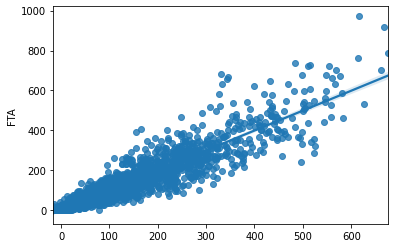

In [52]:
sns.regplot(preds,y_test);

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=X['All-Star'])

In [54]:
sc =StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train_sc,y_train)
print(f'Train Score:{rf.score(X_train_sc,y_train)}')
print(f'Test Score:{rf.score(X_test_sc,y_test)}')

Train Score:0.8753119148315085
Test Score:0.8402280833450038


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=X['All-Star'])

In [39]:
sc =StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
svr = SVR()
svr.fit(X_train_sc,y_train)
print(f'Train Score:{svr.score(X_train_sc,y_train)}')
print(f'Test Score:{svr.score(X_test_sc,y_test)}')

Train Score:0.6213187017520072
Test Score:0.6243449587267161
